In [1]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr

# **Extract zip file**

In [8]:
from zipfile import ZipFile
name= "data.zip"

with ZipFile (name,"r") as zip :
  zip.extractall()
  print ("DONE")

DONE


# **Remove dodgy images**

In [9]:
data_dir = 'cnn_FB' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list cnn_FB/football/stock-photo-soccer-ball-football-ball-123778060.jpg
Image not in ext list cnn_FB/basketball/basketball12.gif
Image not in ext list cnn_FB/basketball/padre_basketball.gif


# **Load Data**

In [11]:
import numpy as np
from matplotlib import pyplot as plt

Found 311 files belonging to 2 classes.


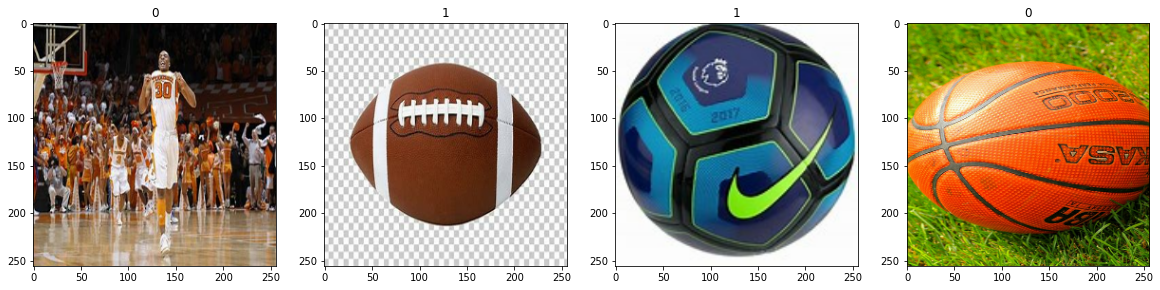

In [15]:
data = tf.keras.utils.image_dataset_from_directory('cnn_FB')

data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
#class 1 (football)
#class 0 (basketball)

# **Scaling**

In [17]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[8.6274512e-02, 2.7450981e-02, 0.0000000e+00],
          [8.6274512e-02, 2.7450981e-02, 0.0000000e+00],
          [8.6274512e-02, 2.7450981e-02, 0.0000000e+00],
          ...,
          [7.8431377e-03, 3.9215689e-03, 0.0000000e+00],
          [7.8431377e-03, 3.9215689e-03, 0.0000000e+00],
          [7.8431377e-03, 3.9215689e-03, 0.0000000e+00]],
 
         [[8.6274512e-02, 2.7450981e-02, 0.0000000e+00],
          [8.6274512e-02, 2.7450981e-02, 0.0000000e+00],
          [8.6274512e-02, 2.7450981e-02, 0.0000000e+00],
          ...,
          [1.1259191e-02, 7.3376223e-03, 0.0000000e+00],
          [1.1259191e-02, 7.3376223e-03, 0.0000000e+00],
          [1.1259191e-02, 7.3376223e-03, 0.0000000e+00]],
 
         [[8.6274512e-02, 2.7450981e-02, 0.0000000e+00],
          [8.6274512e-02, 2.7450981e-02, 0.0000000e+00],
          [8.6274512e-02, 2.7450981e-02, 0.0000000e+00],
          ...,
          [2.1001838e-02, 7.8431377e-03, 3.0790442e-03],
          [2.1001838e-02, 7.8431377e-

# **Split Data**

In [18]:
len(data)

10

In [19]:
train_size = int(len(data)*(10/21))
val_size = int(len(data)*(6/21))
test_size = int(len(data)*(5/21))
train_size

4

In [20]:
test_size

2

In [21]:
val_size

2

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# **Deep Learning Model**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()
model.add(Conv2D(8, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      2336      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

# **Train**

In [27]:
save='saved'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=save)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 12s 615ms/step - loss: 2.9770 - accuracy: 0.3594 - val_loss: 1.5181 - val_accuracy: 0.4375
Epoch 2/20
4/4 [==============================] - 4s 931ms/step - loss: 1.0767 - accuracy: 0.5078 - val_loss: 0.6696 - val_accuracy: 0.5781
Epoch 3/20
4/4 [==============================] - 3s 565ms/step - loss: 0.6782 - accuracy: 0.5781 - val_loss: 0.6918 - val_accuracy: 0.4844
Epoch 4/20
4/4 [==============================] - 4s 919ms/step - loss: 0.6882 - accuracy: 0.5078 - val_loss: 0.6729 - val_accuracy: 0.5625
Epoch 5/20
4/4 [==============================] - 4s 924ms/step - loss: 0.6597 - accuracy: 0.6641 - val_loss: 0.5803 - val_accuracy: 0.7812
Epoch 6/20
4/4 [==============================] - 4s 925ms/step - loss: 0.5918 - accuracy: 0.7031 - val_loss: 0.4880 - val_accuracy: 0.7656
Epoch 7/20
4/4 [==============================] - 4s 924ms/step - loss: 0.4961 - accuracy: 0.7812 - val_loss: 0.6727 - val_accuracy: 0.6719
Epoch 8/20
4/4 [===

# **Plot Performance**

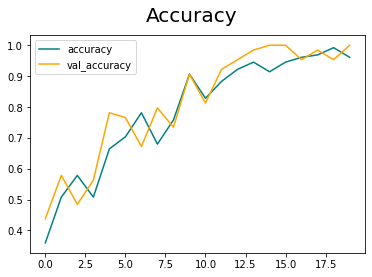

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# **Calculationns**

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 27ms/step


In [33]:
print(f'''precision: {pre.result()}
Recall: {re.result()}
Accuracy: {acc.result()}''')

precision: 0.9677419066429138
Recall: 1.0
Accuracy: 0.984375


# **Test**

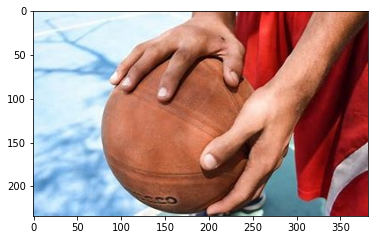

In [35]:
img = cv2.imread('/content/basketball_test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

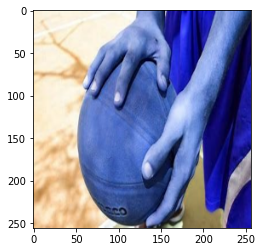

In [36]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat


1/1 [==============================] - 0s 144ms/step


array([[0.0024146]], dtype=float32)

In [38]:
if yhat >0.55: 
    print(f'Predicted class is Football')
else:
    print(f'Predicted class is Basketball')

Predicted class is Basketball


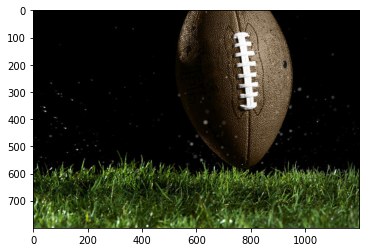

In [46]:
img1 = cv2.imread("/content/football_test.jpg")
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.show()

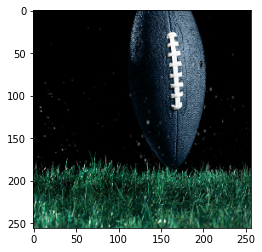

In [40]:
rescale = tf.image.resize(img1, (256,256))
plt.imshow(rescale.numpy().astype(int))
plt.show()

In [41]:
y = model.predict(np.expand_dims(rescale/255, 0))
y


1/1 [==============================] - 0s 14ms/step


array([[0.9658946]], dtype=float32)

In [42]:
if y >0.55: 
    print(f'Predicted class is Football')
else:
    print(f'Predicted class is Basketball')

Predicted class is Football


# **Save the Model**

In [43]:

from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))


In [44]:
new_model = load_model('/content/models/imageclassifier.h5')